<h1>Decision Tree</h1>

Decision Tree is a powerful supervised algorith for both classification and regression.
It represents rules in form of a tree structure which can be understood by humans.

<h2>Entropy</h2>

It defines randomness (impurity) in data. The first step is to solve the problem of decision tree.

Entropy(s) = P(yes) log P(yes) - P(no) log P(no)

where 
* S is the total sample space
* P(yes) is probability of yes

If number of yes = number of no i.e P(S) = 0.5
Entropy (s) = 1

If it contains all yes or all no i.e P(S) = 1 or 0
Entropy (s) = 0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import pydotplus
from IPython.display import Image

<h2>Load CSV File</h2>

In [4]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h2>Define X and Y</h2>

In [6]:
x = df.iloc[:, :-1].values
y=df.loc[:,'DEATH_EVENT'].values

<h2>Split to train and test</h2>

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [8]:
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

[[7.000e+01 1.000e+00 1.430e+02 ... 0.000e+00 0.000e+00 9.000e+01]
 [8.700e+01 1.000e+00 1.490e+02 ... 1.000e+00 0.000e+00 1.400e+01]
 [4.500e+01 0.000e+00 7.702e+03 ... 1.000e+00 0.000e+00 6.000e+01]
 ...
 [6.000e+01 0.000e+00 8.970e+02 ... 1.000e+00 0.000e+00 8.000e+01]
 [7.000e+01 0.000e+00 6.900e+01 ... 0.000e+00 0.000e+00 7.500e+01]
 [6.400e+01 1.000e+00 6.200e+01 ... 0.000e+00 0.000e+00 1.740e+02]]
(239, 12)
[1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
(239,)


<h2>Instantiate DecisionTreeClassifier</h2>

In [9]:
DecisionTreeClassifier.__dict__

mappingproxy({'__module__': 'sklearn.tree._classes',
              '__annotations__': {'_parameter_constraints': dict},
              '__doc__': 'A decision tree classifier.\n\n    Read more in the :ref:`User Guide <tree>`.\n\n    Parameters\n    ----------\n    criterion : {"gini", "entropy", "log_loss"}, default="gini"\n        The function to measure the quality of a split. Supported criteria are\n        "gini" for the Gini impurity and "log_loss" and "entropy" both for the\n        Shannon information gain, see :ref:`tree_mathematical_formulation`.\n\n    splitter : {"best", "random"}, default="best"\n        The strategy used to choose the split at each node. Supported\n        strategies are "best" to choose the best split and "random" to choose\n        the best random split.\n\n    max_depth : int, default=None\n        The maximum depth of the tree. If None, then nodes are expanded until\n        all leaves are pure or until all leaves contain less than\n        min_samples_s

In [10]:
model = DecisionTreeClassifier()

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

<h2>Visualize Graph</h2>

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Graphviz/bin/'

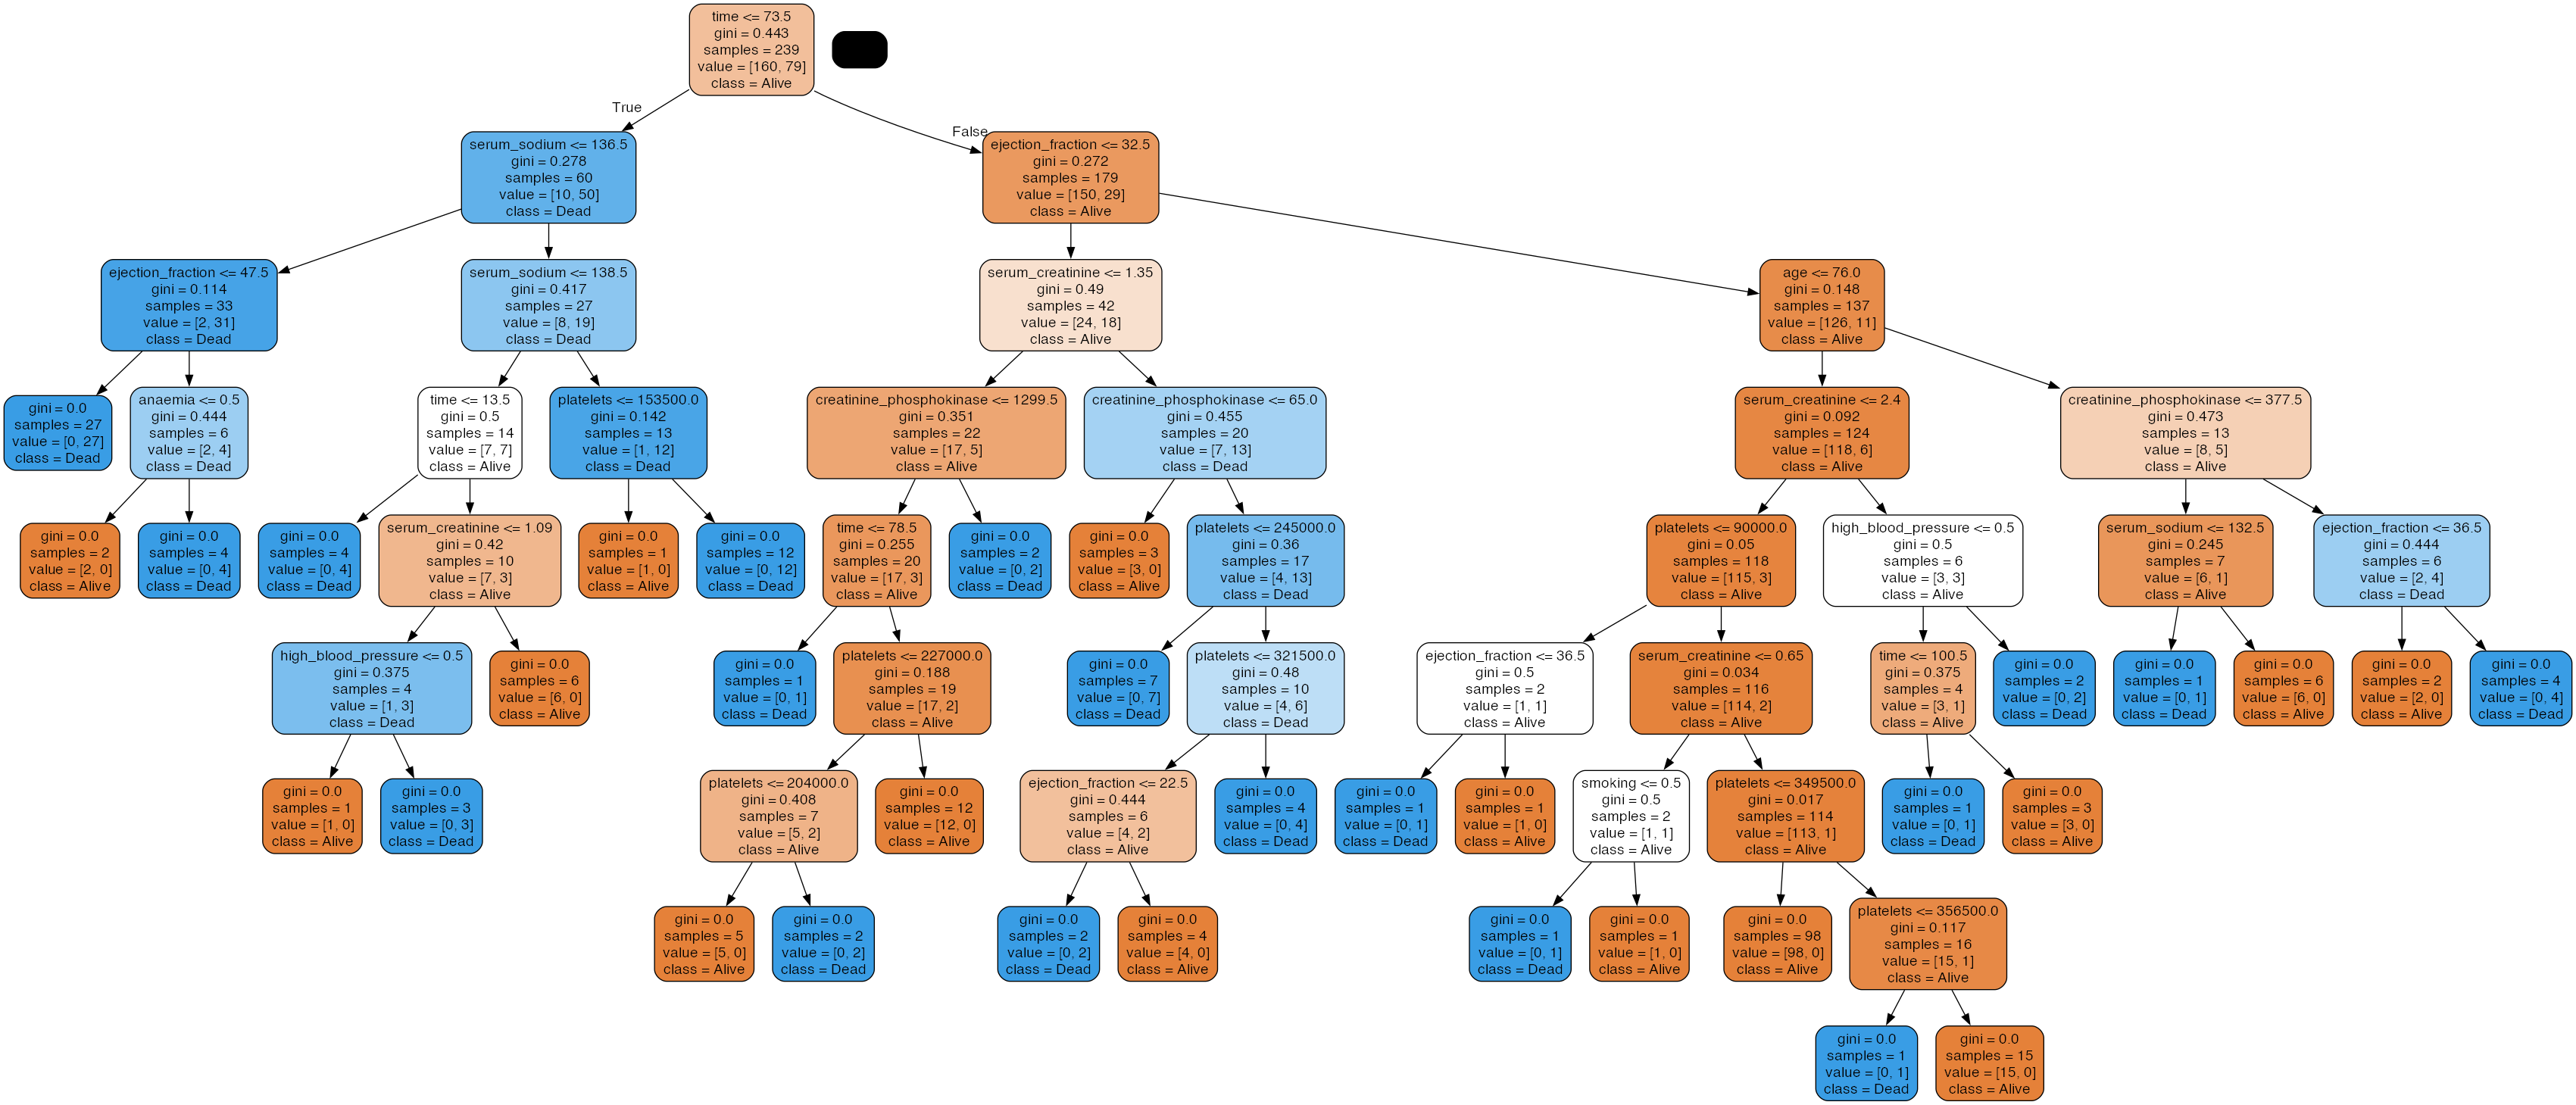

In [13]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names = list(df.columns[:-1].values), class_names=['Alive', 'Dead'], 
                                 rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)

Image(graph.create_png())

<h2>Predict on Test Data</h2>

In [14]:
y_pred = model.predict(x_test)

<h2>Evaluation Metrics</h2>

In [22]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [23]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.8166666666666667
Recall-Score : 0.625
Precision-Score : 0.8823529411764706
F1-Score : 0.7317073170731707


In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.88      0.62      0.73        24

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.80        60
weighted avg       0.83      0.82      0.81        60



<h2>Confustion Matrix</h2>

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

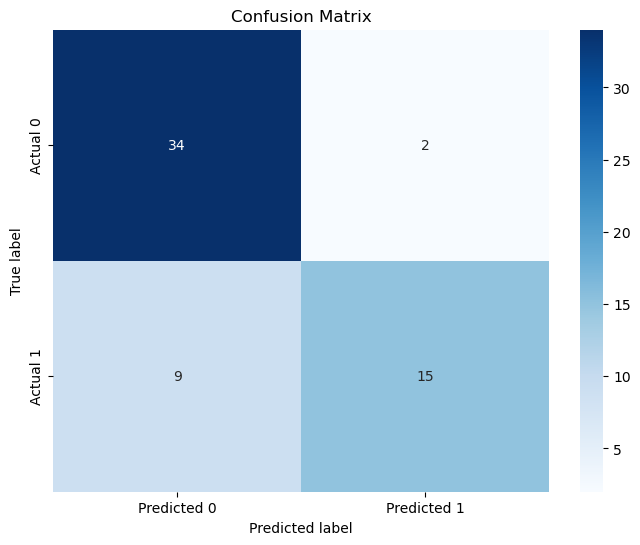

In [26]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
x_test[0]

array([6.50e+01, 0.00e+00, 1.13e+02, 1.00e+00, 2.50e+01, 0.00e+00,
       4.97e+05, 1.83e+00, 1.35e+02, 1.00e+00, 0.00e+00, 6.70e+01])

In [28]:
test = [634,0,113,1,25,0,49700,1.83,135,1,0,67]

In [29]:
model.predict([test])

array([1], dtype=int64)